In [2]:
import pandas as pd
import numpy as np
import statistics
import math
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.models import model_from_json

C:\Users\HeavyRain350\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\HeavyRain350\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\HeavyRain350\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [21]:
train = pd.read_csv("train.csv",skip_blank_lines = False) 
test = pd.read_csv("test.csv",skip_blank_lines = False) 
train_x = train.iloc[:,1:161]
train_y = train.iloc[:,0:1]
test_x = test.iloc[:,1:161]
test_y = test.iloc[:,0:1]

sc = StandardScaler() 
train_x = sc.fit_transform(train_x) 
test_x = sc.transform(test_x)

In [12]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
opt = keras.optimizers.Adadelta(learning_rate=0.005, rho=0.55, epsilon=3.5e-04)

#my_lr_scheduler = keras.callbacks.LearningRateScheduler(adapt_learning_rate) 
loaded_model.compile(optimizer=opt, loss='mse',metrics=['mae','mse','mape'])


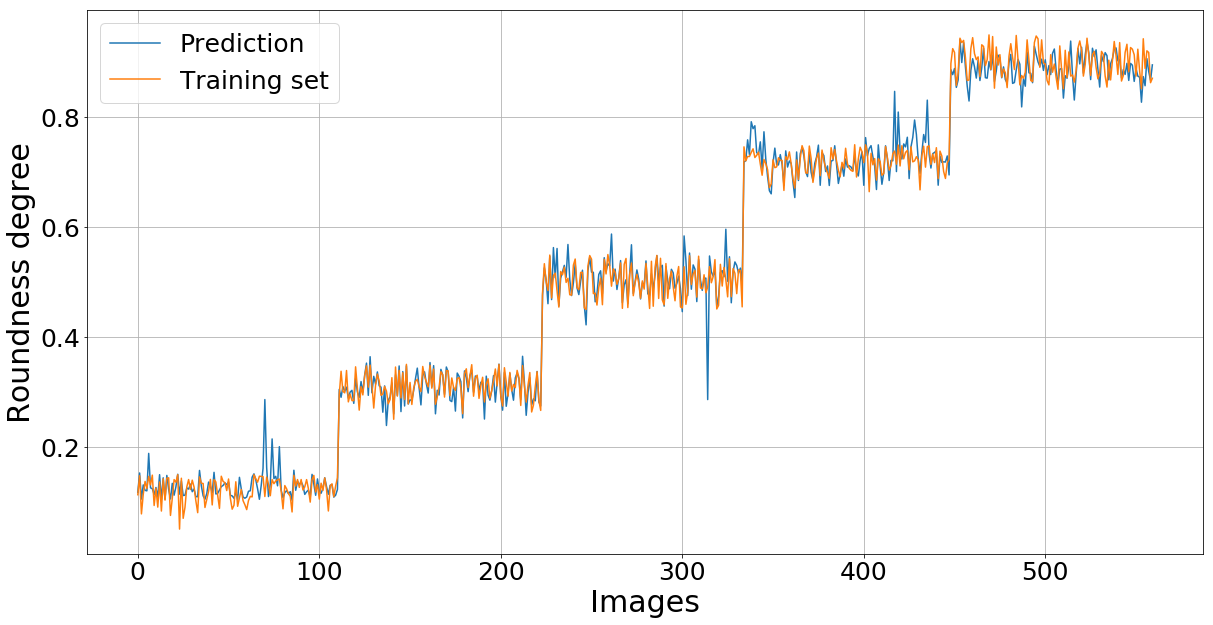

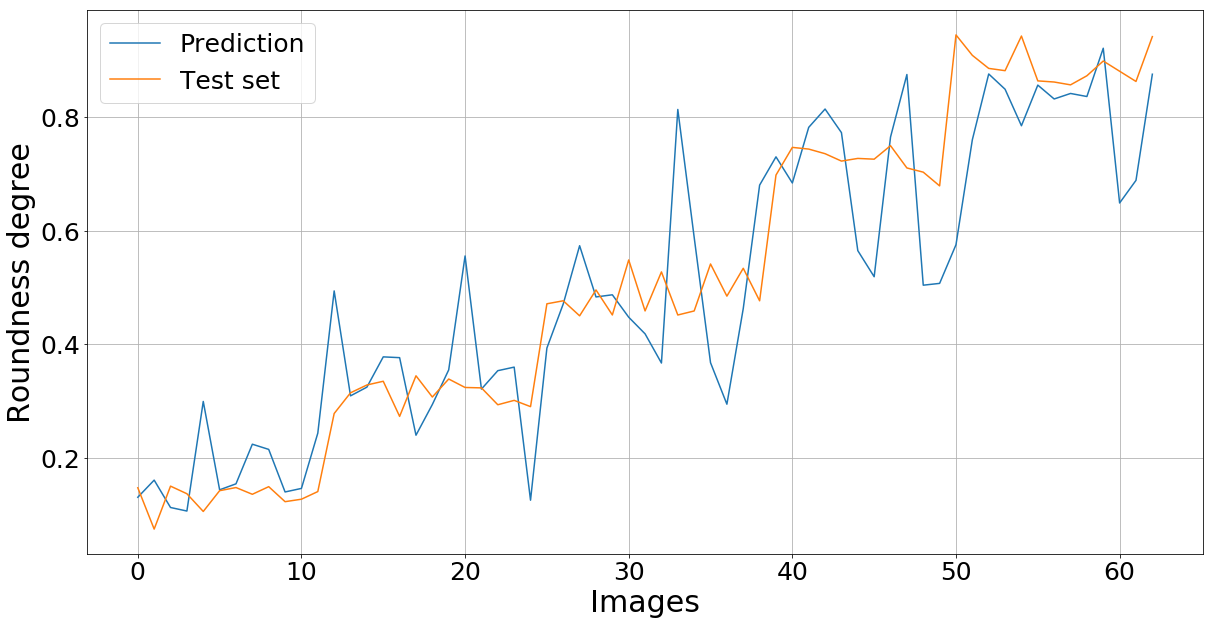

In [22]:
#Plot the real y against the predicted one

##Train
train_y = train_y.reset_index().sort_values('index') 
train_x = train_x[train_y.index]
train_y = train_y.reset_index() 
ynew = loaded_model.predict(train_x) 
diff = abs(ynew - train_y) 
dummy_y = train_y 
dummy_y['predicted'] = ynew 
mse = mean_squared_error(dummy_y['roundness'], dummy_y['predicted']) 
me = statistics.stdev(dummy_y['predicted'])/math.sqrt(dummy_y['predicted'].shape[0]) 
fig0 = plt.figure(0,figsize=(20,10)) 
plt.plot(dummy_y['predicted'].sort_index(), label="Prediction") 
plt.plot(dummy_y['roundness'].sort_index(), label="Training set") 
plt.rc('legend', fontsize=25) 
plt.ylabel('Roundness degree', fontsize=30) 
plt.xlabel('Images', fontsize=30) 
plt.legend(loc="upper left")

#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35)
plt.xticks(size = 25) 
plt.yticks(size = 25) 
plt.grid(True)
plt.show 
plt.savefig('trainingComparition.png')

##Test
test_res = test_y 

test_res = test_res.reset_index().sort_values('index') 
test_x = test_x[test_res.index]
test_res = test_res.reset_index() 
ynew = loaded_model.predict(test_x) 
diff2 = abs(ynew - test_y) 
test_res['predicted'] = ynew 
mse2 = mean_squared_error(test_res['roundness'], test_res['predicted']) 
me2 = statistics.stdev(test_res['predicted'])/math.sqrt(test_res['predicted'].shape[0]) 
plt.figure(figsize=(20,10)) 
plt.plot(test_res['predicted'].sort_index(), label="Prediction") 
plt.plot(test_res['roundness'].sort_index(), label="Test set") 
plt.rc('legend', fontsize=25) 
plt.ylabel('Roundness degree', fontsize=30) 
plt.xlabel('Images', fontsize=30) 
plt.legend(loc="upper left")

plt.xticks(size = 25) 
plt.yticks(size = 25) 
plt.grid(True) 
plt.show
plt.savefig('testComparition.png')

In [35]:
#Mean squared error of training set
mse

0.0006926054521985603

In [36]:
#Mean error of training set
me

0.011671806221922024

In [37]:
#Mean squared error of test set
mse2

0.016007816158511514

In [38]:
#Mean error of test set
me2

0.03131543863693523

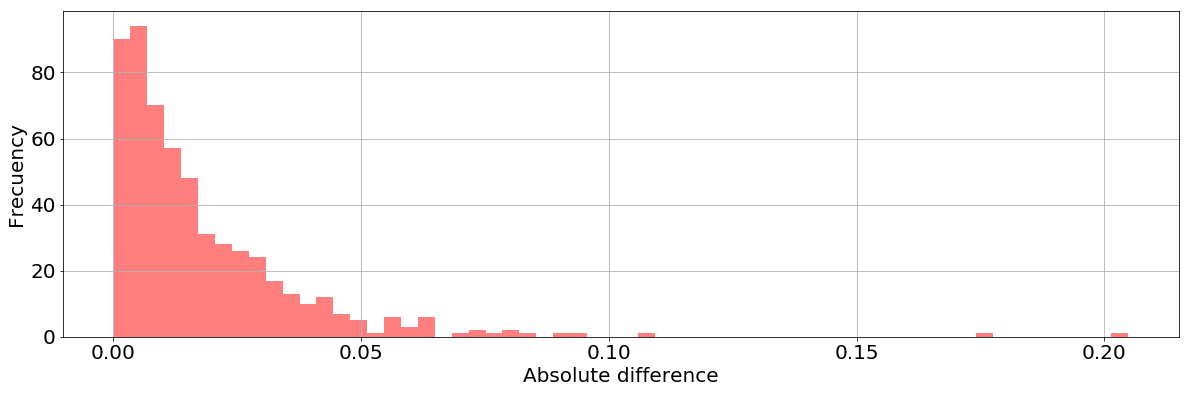

In [27]:
#Histogram of absolute differences Train set
abEr = abs(dummy_y['roundness']-dummy_y['predicted'])
fig=plt.figure(figsize=(20,6))
n, bins, patches = plt.hist(abEr, 60, facecolor='red', alpha=0.5)

# add a 'best fit' line
plt.xlabel('Absolute difference', fontsize=20)
plt.ylabel('Frecuency', fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)
#plt.title("Histograma del error absoluto",fontsize=28)
plt.show()
fig.savefig('histogramaErrorAbTrain.png')

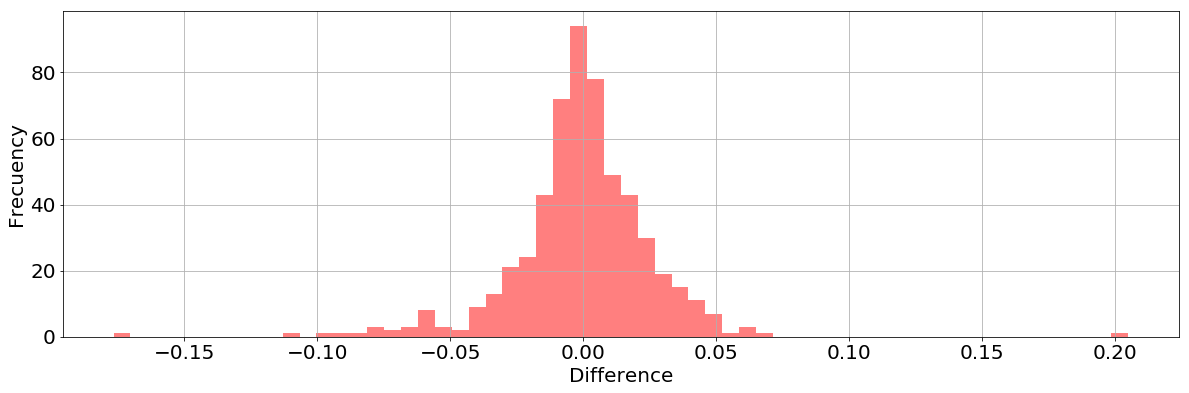

In [28]:
#Histogram of differences Train set
er = dummy_y['roundness']-dummy_y['predicted']
fig=plt.figure(figsize=(20,6))
n, bins, patches = plt.hist(er, 60, facecolor='red', alpha=0.5)

# add a 'best fit' line
plt.xlabel('Difference', fontsize=20)
plt.ylabel('Frecuency', fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)
#plt.title("Histograma del error absoluto",fontsize=28)
plt.show()
fig.savefig('histogramaErrorTrain.png')

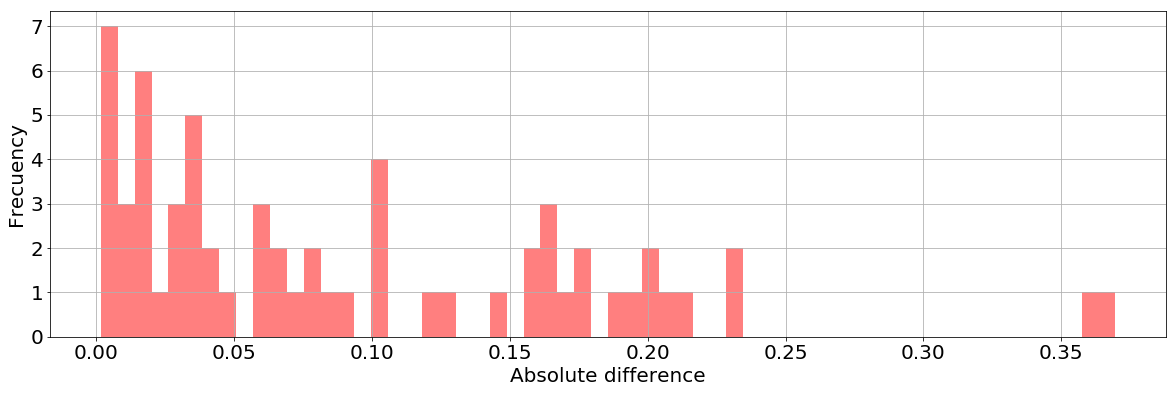

In [29]:
#Histogram of absolute differences test set
abEr = abs(test_res['roundness']-test_res['predicted'])
fig=plt.figure(figsize=(20,6))
n, bins, patches = plt.hist(abEr, 60, facecolor='red', alpha=0.5)

# add a 'best fit' line
plt.xlabel('Absolute difference', fontsize=20)
plt.ylabel('Frecuency', fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)
#plt.title("Histograma del error absoluto",fontsize=28)
plt.show()
fig.savefig('histogramaErrorAbTest.png')

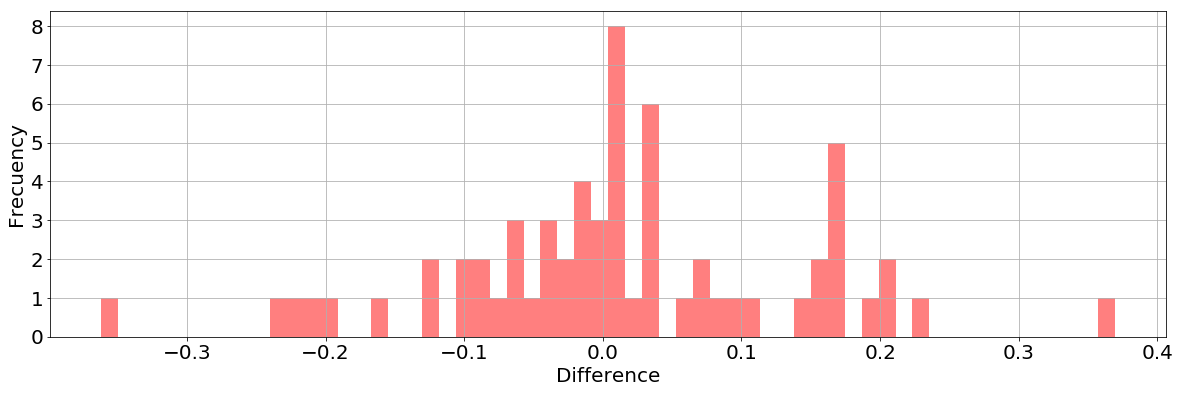

In [30]:
#Histogram of differences test set
er = test_res['roundness']-test_res['predicted']
fig=plt.figure(figsize=(20,6))
n, bins, patches = plt.hist(er, 60, facecolor='red', alpha=0.5)

# add a 'best fit' line
plt.xlabel('Difference', fontsize=20)
plt.ylabel('Frecuency', fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)
#plt.title("Histograma del error absoluto",fontsize=28)
plt.show()
fig.savefig('histogramaErrorTest.png')

In [31]:
abEr = abs(dummy_y['roundness']-dummy_y['predicted'])
set1 = abEr[abEr < 0.05]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

94.64285714285714

In [34]:
abEr = abs(test_res['roundness']-test_res['predicted'])
set1 = abEr[abEr < 0.05]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

42.857142857142854